# Foundations of AI & ML
## Session 06
### Experiment 2 
### Hierarchical Clustering on MNIST Dataset

In this experiment, we discuss hierarchical clustering methods. Heirarchial clustering algorithms build nested clusters by repeatedly merging two clusters in the bottom up approach and successively splitting a cluster into two  in the top-down approach. This hierarchy of clusters is represented as a dendrogram. Dendrogram is a tree diagram popularly used to illustrate the arrangement of the heirarchy of clusters produced by hierarchical clustering algorithms.

MNIST is a classic dataset of handwritten images. It is a popular dataset used for benchmarking classification algorithms.

#### Importing the requried packages

In [1]:
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets

#### Import the dataset

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
np.random.seed(0)
print(len(X))
def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, hence we double the number of samples in the dataset by shifting.
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)
print(len(X))

1797
3594


#### Visualize the clusters formed 

In [3]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

#### 2D embedding of the digits dataset

Hierarchical clustering generally fall into two types:

**Agglomerative**: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
**Divisive**: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In this experiment we are going to use Agglomerative Clustering.

The linkage criteria determines the distance metric used for the merge strategy:

Here we use **ward** which minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but addressed with an agglomerative hierarchical approach.

You can also check with other linkage criteria **Complete** and **Average**

Computing embedding
Done.
ward : 0.45s


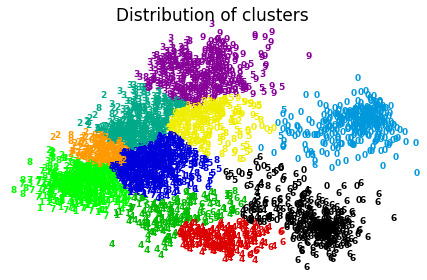

In [5]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters=10)
t0 = time()
clustering.fit(X_red)
print("%s : %.2fs" % ('ward', time() - t0))
plot_clustering(X_red, clustering.labels_, "Distribution of clusters" )

plt.show()

In [6]:
X_red

array([[ 0.70499308,  0.34320745],
       [-0.2871234 , -0.22975544],
       [-0.20785669, -0.09970102],
       ...,
       [-0.23893316, -0.19945221],
       [ 0.12713764,  0.26342338],
       [-0.05237265, -0.02221444]])

Computing embedding
Done.
average : 0.30s


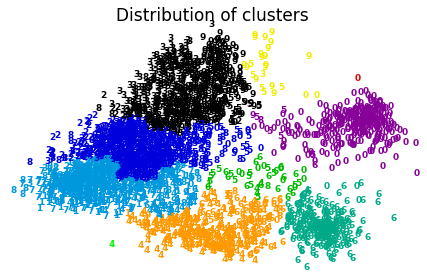

In [9]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average', n_clusters=10)
t0 = time()
clustering.fit(X_red)
print("%s : %.2fs" % ('average', time() - t0))
plot_clustering(X_red,clustering.labels_, "Distribution of clusters" )

plt.show()

Computing embedding
Done.
complete : 0.28s


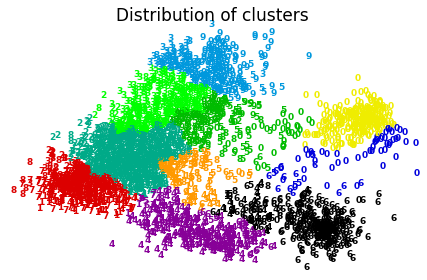

In [10]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='complete', n_clusters=10)
t0 = time()
clustering.fit(X_red)
print("%s : %.2fs" % ('complete', time() - t0))
plot_clustering(X_red,clustering.labels_, "Distribution of clusters" )

plt.show()

#### Plotting dendrogram 

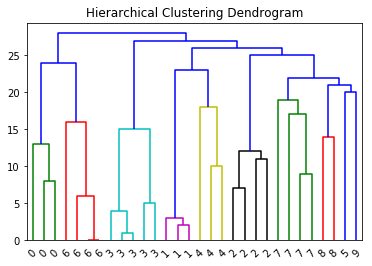

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


x = X[40:70]
model = AgglomerativeClustering(linkage='ward')

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=y[40:70])
#plt.plot((0,400),(20,20))
plt.show()

### Using Linkage as complete

**Excerise:** If we define the clusters to be the set of points with distance between each other < 20, what are the number of classes we will obtain?

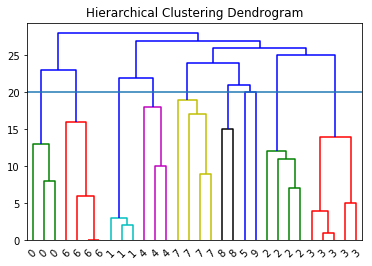

In [12]:
x = X[40:70]
model = AgglomerativeClustering(linkage='complete')

model = model.fit(x)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=y[40:70])
plt.plot((0,400),(20,20))
plt.show()

**Answer ::** we will get nine clusters